In [3]:
import os
import json
import re
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from dateutil.parser import parse

In [5]:
IMMIGRATION_PATTERN = re.compile(
    r'\b(immigration|immigrant?s|immigrat(e|ed|ing|es)|migration|migrant?s|migrat(e|ed|ing|es)|green\s?card|'
    r'citizenship|naturalization|naturaliz(e|ed|ing|es)|asylum|refugee?s|border|deportation|deport(s|ed|ing)?|'
    r'undocumented|DACA|Dreamers|ICE|USCIS|Title\s?42|Title\s?8|sanctuary\s?cities|sanctuary\s?city|'
    r'Temporary\s?Protected\s?Status|TPS|path\s?to\s?citizenship|DAPA|travel\s?ban|family\s?separation)\b',
    flags=re.IGNORECASE
)

BASE_PATH = "/scratch/bhx5gh/IndependentStudy/ScrapingResults"
CUTOFF_DATE = datetime(2016, 1, 1)

In [16]:
results = {
    'sources': {},
    'overall_immigration_dates': []
}

for filename in os.listdir(BASE_PATH):
    if not filename.endswith('.json'):
        continue
    
    source_name = os.path.splitext(filename)[0]
    print(source_name)
    filepath = os.path.join(BASE_PATH, filename)
    
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    source_stats = {
        'total_articles': 0,
        'earliest_date': None,
        'immigration_count': 0,
        'immigration_dates': []
    }
    
    for article in data:
        # Date processing
        date_str = article.get('date')

        if source_name == 'bx_times':
            source_stats['total_articles'] += 1
            if IMMIGRATION_PATTERN.search(article.get('title', '')):
                source_stats['immigration_count'] += 1
                results['overall_immigration_dates'].append(article_date)


        if not date_str:
            continue
        
        try:
            # Convert to naive datetime
            article_date = parse(date_str).replace(tzinfo=None)
        except:
            continue
        
        # Update earliest date
        if article_date >= CUTOFF_DATE:
            source_stats['total_articles'] += 1
            if not source_stats['earliest_date'] or article_date < source_stats['earliest_date']:
                source_stats['earliest_date'] = article_date
        
        # Immigration articles
        if IMMIGRATION_PATTERN.search(article.get('title', '')) and article_date >= CUTOFF_DATE:
            source_stats['immigration_count'] += 1
            source_stats['immigration_dates'].append(article_date)
            results['overall_immigration_dates'].append(article_date)
    
    results['sources'][source_name] = source_stats

chicago_tribune
ny_daily_news
daily_herald
newsday
chicago_reporter
the_city
bx_times


In [17]:
overall_total = sum(s['total_articles'] for s in results['sources'].values())
overall_immigration = sum(s['immigration_count'] for s in results['sources'].values())

In [18]:
print(f"{'News Source':<30} {'Total Articles':>15} {'Earliest Date':>20} {'Immigration Articles':>20}")
for source, stats in results['sources'].items():
    print(f"{source:<30} {stats['total_articles']:>15} {stats['earliest_date'].strftime('%Y-%m-%d') if stats['earliest_date'] else 'N/A':>20} {stats['immigration_count']:>20}")

print(f"\nOverall Total Articles: {overall_total}")
print(f"Overall Immigration Articles: {overall_immigration}")

News Source                     Total Articles        Earliest Date Immigration Articles
chicago_tribune                          30663           2023-02-20                  371
ny_daily_news                            64582           2018-04-02                 1096
daily_herald                             13973           2016-01-01                  141
newsday                                 361036           2016-01-01                 3711
chicago_reporter                           941           2016-01-04                   28
the_city                                  6070           2018-07-16                  158
bx_times                                 32858                  N/A                   80

Overall Total Articles: 510123
Overall Immigration Articles: 5585


In [22]:
chicago_total_articles = 0
chicago_immigration_articles = 0
ny_total_articles = 0
ny_immigration_articles = 0

for source, stats in results['sources'].items():
  if source in ['chicago_tribune', 'daily_herald', 'chicago_reporter']:
    chicago_total_articles += stats['total_articles']
    chicago_immigration_articles += stats['immigration_count']
  else:
    ny_total_articles += stats['total_articles']
    ny_immigration_articles += stats['immigration_count']


print(f"{'City':<20} {'Total Articles':>15} {'Immigration Articles':>20}")
print(f"{'Chicago':<20} {chicago_total_articles:>15} {chicago_immigration_articles:>20}")
print(f"{'New York':<20} {ny_total_articles:>15} {ny_immigration_articles:>20}")

City                  Total Articles Immigration Articles
Chicago                        45577                  540
New York                      464546                 5045


In [23]:
def plot_histogram(dates, title, color='skyblue'):
    if not dates:
        print(f"No data for {title}")
        return
    
    dates_series = pd.to_datetime(dates)
    start_date = CUTOFF_DATE
    
    # Use month start frequency for fixed intervals
    try:
        end_date = dates_series.max().ceil('6MS')  # 6-month start frequency
    except ValueError:
        end_date = dates_series.max() + pd.offsets.DateOffset(months=6)
    
    bins = pd.date_range(start=start_date, end=end_date, freq='6MS')
    
    plt.figure(figsize=(12, 6))
    plt.hist(dates_series, bins=bins, edgecolor='black', color=color)
    plt.title(f"Immigration Articles Over Time: {title}")
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

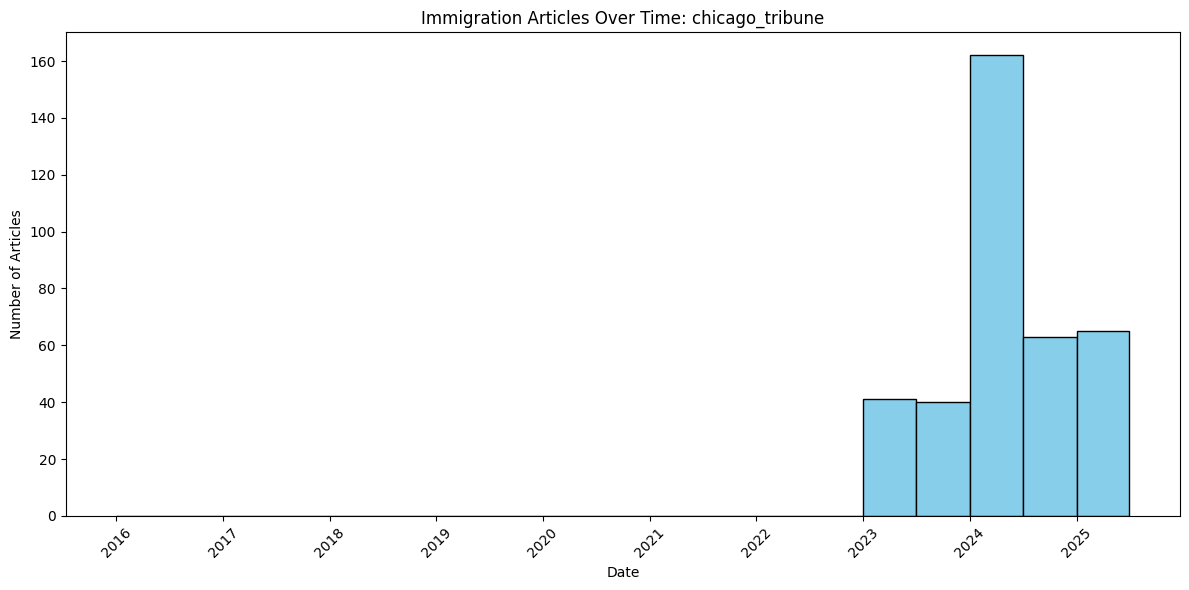

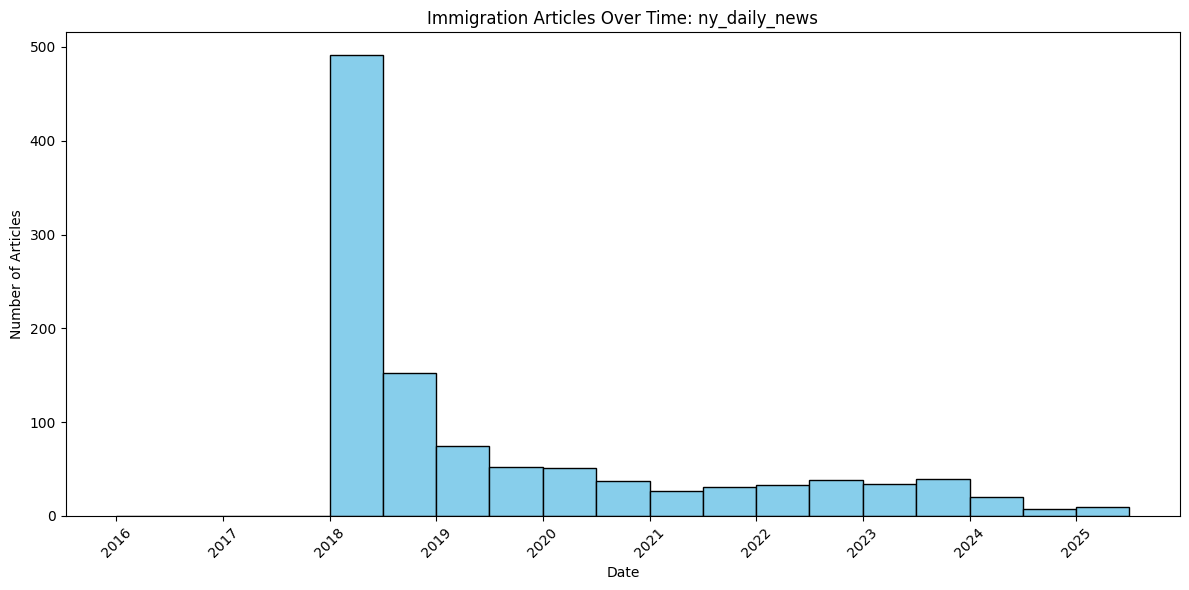

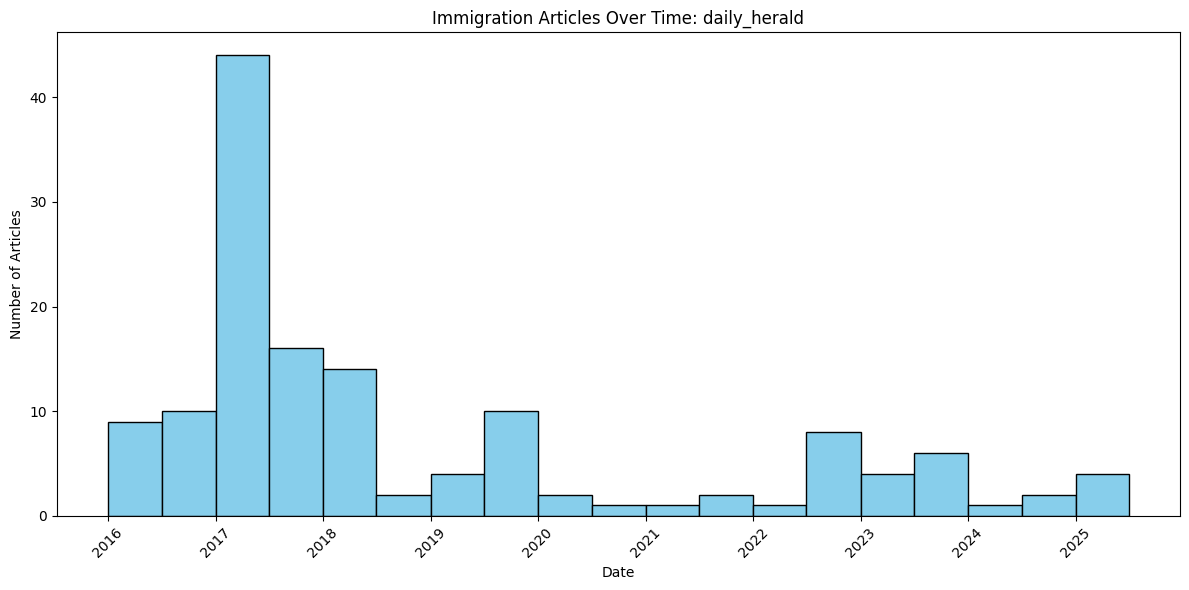

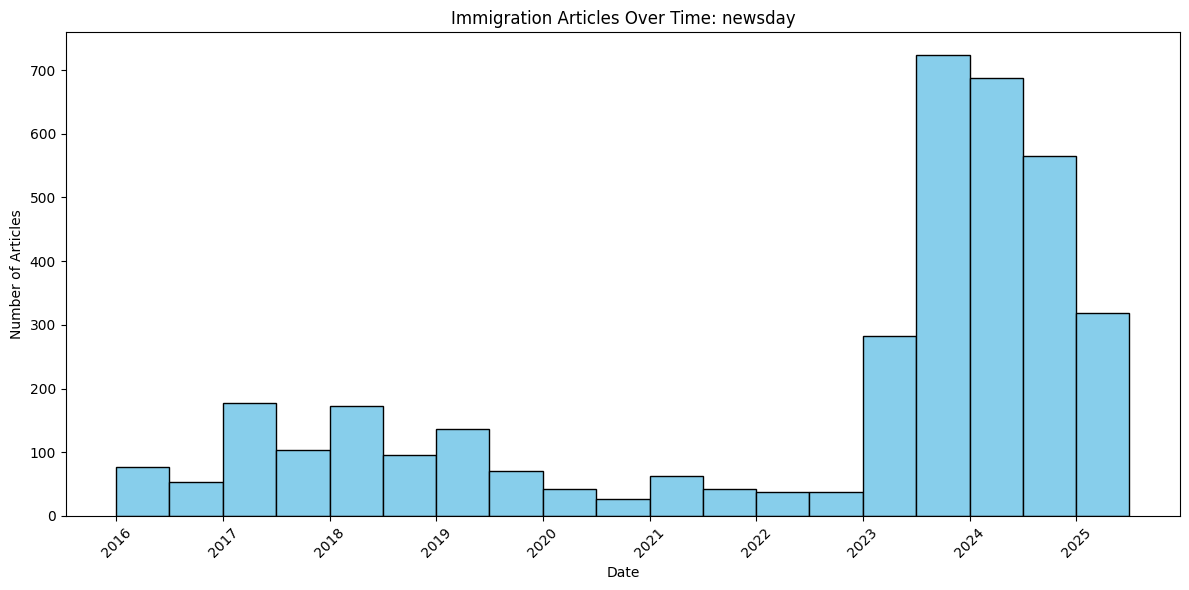

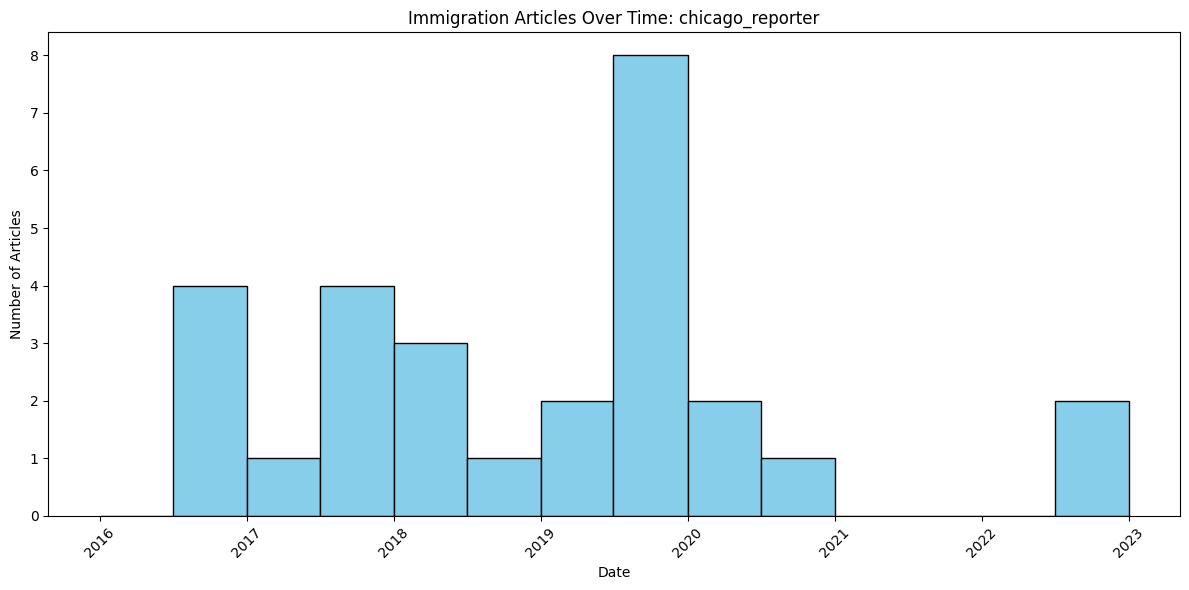

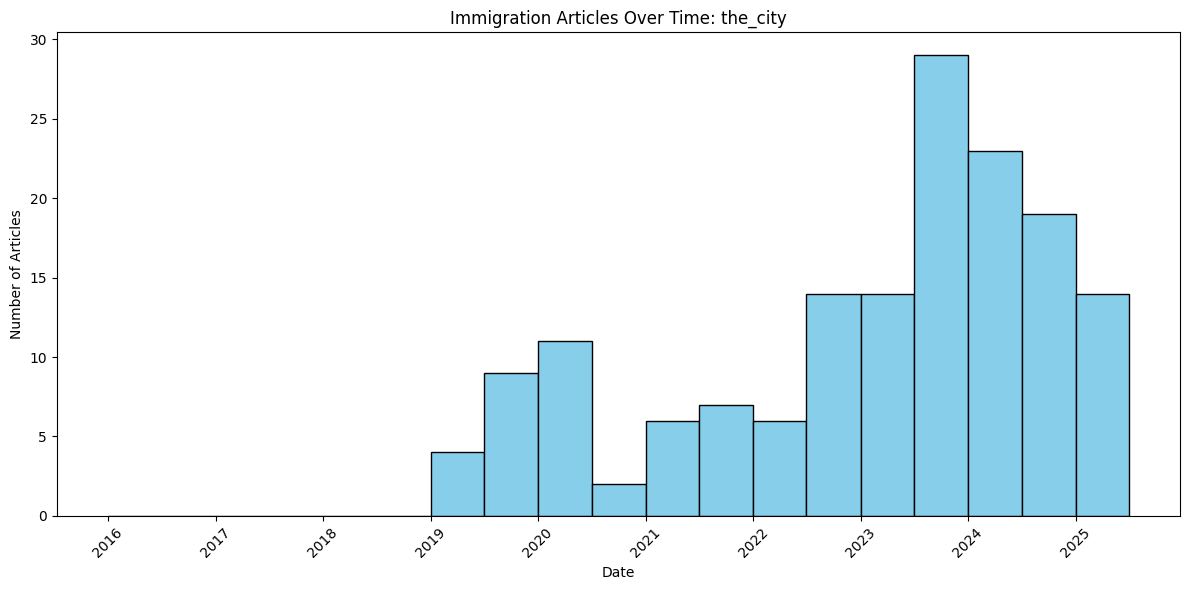

No data for bx_times


In [24]:
for source_name, stats in results['sources'].items():
    plot_histogram(stats['immigration_dates'], source_name)

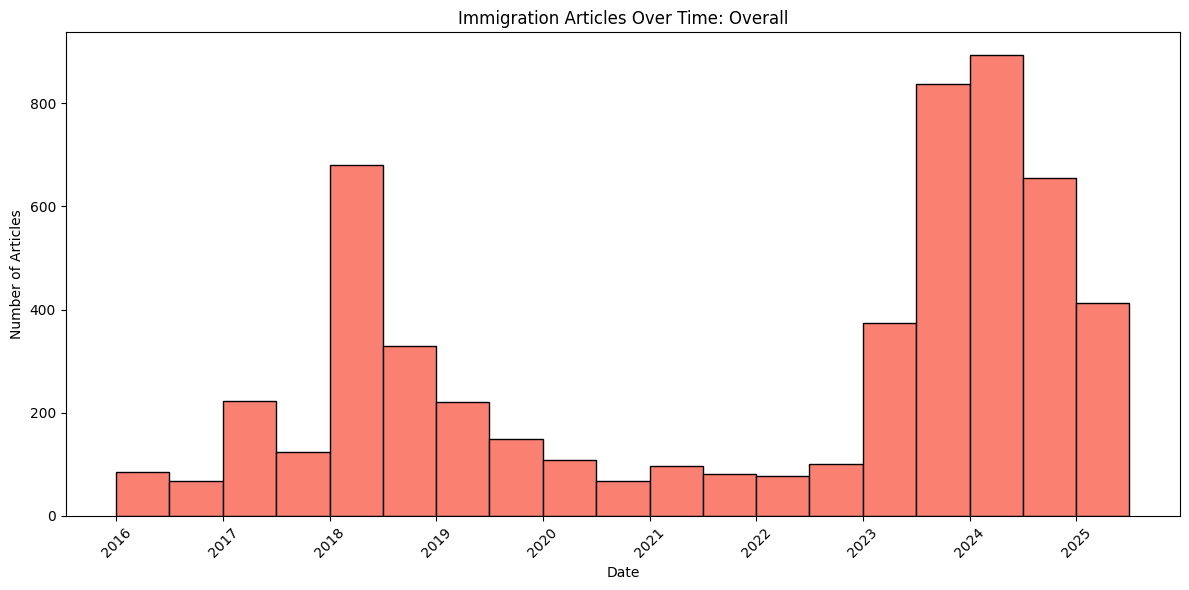

In [25]:
plot_histogram(results['overall_immigration_dates'], "Overall", color='salmon')